## Introduction

Welcome to my data science notebook!. I'm excited to take you on a journey through my exploration of Kenya Airways data.

In this notebook, I'll be sharing the process, techniques, and insights derived from my analysis of Kenya Airways data. This project stems from my ongoing journey in data science and serves as an opportunity for me to apply the skills and knowledge I've gained.

Throughout this notebook, you'll see how I've leveraged various data science tools and methodologies to uncover patterns, trends, and insights within the Kenya Airways data. 

I started by scraping customer reviews from SkyTrax and then preprocessed the text data to prepare it for analysis. After that, I used Latent Dirichlet Allocation (LDA) to perform topic modeling on the reviews, revealing underlying themes and topics discussed by passengers.

In addition to topic modeling, I conducted sentiment analysis on the reviews to gauge the overall sentiment of passengers towards Kenya Airways. This analysis provided valuable insights into customer satisfaction and areas for improvement.

To further explore the data, I visualized the top words associated with each topic using bar charts. This allowed for a more intuitive understanding of the main themes discussed in the reviews.

My ultimate goal with this project is to not only extract valuable insights for Kenya Airways but also to showcase my abilities as a data scientist and demonstrate my passion for leveraging data to drive informed decision-making.

 Join me on this analytical journey. Your feedback is always appreciated!


### Import Necessary Libraries

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Scraping Reviews of Kenya Airways from SkyTrax

In [25]:
base_url = "https://www.airlinequality.com/airline-reviews/kenya-airways"
pages = 100 
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 459 total reviews
Scraping page 6
   ---> 459 total reviews
Scraping page 7
   ---> 459 total reviews
Scraping page 8
   ---> 459 total reviews
Scraping page 9
   ---> 459 total reviews
Scraping page 10
   ---> 459 total reviews
Scraping page 11
   ---> 459 total reviews
Scraping page 12
   ---> 459 total reviews
Scraping page 13
   ---> 459 total reviews
Scraping page 14
   ---> 459 total reviews
Scraping page 15
   ---> 459 total reviews
Scraping page 16
   ---> 459 total reviews
Scraping page 17
   ---> 459 total reviews
Scraping page 18
   ---> 459 total reviews
Scraping page 19
   ---> 459 total reviews
Scraping page 20
   ---> 459 total reviews
Scraping page 21
   ---> 459 total reviews
Scraping page 22
   ---> 459 total reviews
Scraping page 23
   ---> 459 total reviews
Scraping page 24
   

### View Dataset

In [26]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Kenya Airways flight Nairob...
1,✅ Trip Verified | We were delayed leaving Ams...
2,✅ Trip Verified | Flew from Bangkok via Nairob...
3,Not Verified | I frequently fly to Kinshasa a...
4,✅ Trip Verified | 05 Oct 2023 London-Nairobi....


### Convert to more readable format

In [27]:
df.to_csv("KQ_reviews.csv")


In [28]:
# Assuming df is your DataFrame containing the reviews

# Print the columns
print(df.columns)


Index(['reviews'], dtype='object')


# Data Preprocessing
Here we are preprocessing the textual data, including removing stop words, tokenizing, and vectorizing the text using CountVectorizer.


### View .CSV and Clean

In [29]:
print(df.head())

                                             reviews
0  ✅ Trip Verified |  Kenya Airways flight Nairob...
1  ✅ Trip Verified |  We were delayed leaving Ams...
2  ✅ Trip Verified | Flew from Bangkok via Nairob...
3  Not Verified |  I frequently fly to Kinshasa a...
4  ✅ Trip Verified |  05 Oct 2023 London-Nairobi....


In [30]:
# Assuming df is your DataFrame containing the reviews

# Remove leading and trailing spaces or hidden characters
df['reviews'] = df['reviews'].str.strip()

# Remove specified text
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')
df['reviews'] = df['reviews'].str.replace('Not Verified |', '')

# Save the DataFrame to CSV without including index
df.to_csv("KQ_reviews.csv", index=False)


In [31]:
print(df.head())

                                             reviews
0    Kenya Airways flight Nairobi to London had a...
1    We were delayed leaving Amsterdam by 2 and a...
2   Flew from Bangkok via Nairobi to Kigali 2nd A...
3    I frequently fly to Kinshasa and chose this ...
4    05 Oct 2023 London-Nairobi. We are a couple ...


### Topic Modeling with LDA
We start by preprocessing the textual data, including removing stop words, tokenizing, and vectorizing the text using CountVectorizer.


The LDA model extracts 5 distinct topics from the reviews. Each topic is represented by a set of key words that characterize the theme of the topic. 


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df is your DataFrame containing the reviews

# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the reviews
X = vectorizer.fit_transform(df['reviews'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Function to print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Print the top 10 words for each topic
print("\nTopics in LDA model:")
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words=10)



Topics in LDA model:
Topic #1: flight time good food nairobi nbo seats business crew kq
Topic #2: flight nairobi kenya service airways good time cabin food staff
Topic #3: flight nairobi airways time kenya flights passengers staff boarding hours
Topic #4: kenya flight nairobi airways ticket pay airline fly luggage told
Topic #5: flight nairobi kenya airways hours airline delayed airport staff told



**Analysis**:

**Topic #1**: This topic seems to be related to the overall experience of flying, including aspects like seating, food quality, and the service provided by the crew. The presence of terms like "flight," "seats," "business," and "crew" suggests that this topic may be about the comfort and amenities offered during flights.

**Topic #2**: This topic appears to focus on flights to or from Nairobi, Kenya, with an emphasis on the service provided by the airways. Terms like "flight," "nairobi," "kenya," "service," and "airways" indicate that this topic is about the airline's services and operations in the Nairobi region.

**Topic #3**: This topic seems similar to Topic #2 but with a broader scope, covering flights operated by the airways beyond just Nairobi. It mentions terms like "flights," "passengers," "boarding," and "hours," suggesting a more general discussion about flight operations, boarding procedures, and travel times.

**Topic #4**: This topic appears to be related to ticketing and payment processes for flights operated by the airways. Terms like "kenya," "ticket," "pay," "airline," and "luggage" suggest that this topic may involve discussions about booking flights, paying for tickets, and handling luggage.

**Topic #5**: This topic seems to focus on issues related to flight delays and disruptions, particularly in the context of flights to or from Nairobi, Kenya. Terms like "flight," "nairobi," "kenya," "hours," "delayed," and "airport" indicate discussions about delays, flight schedules, and airport operations.

# Vizualising Topic Models and Filtering



Topics in LDA model:


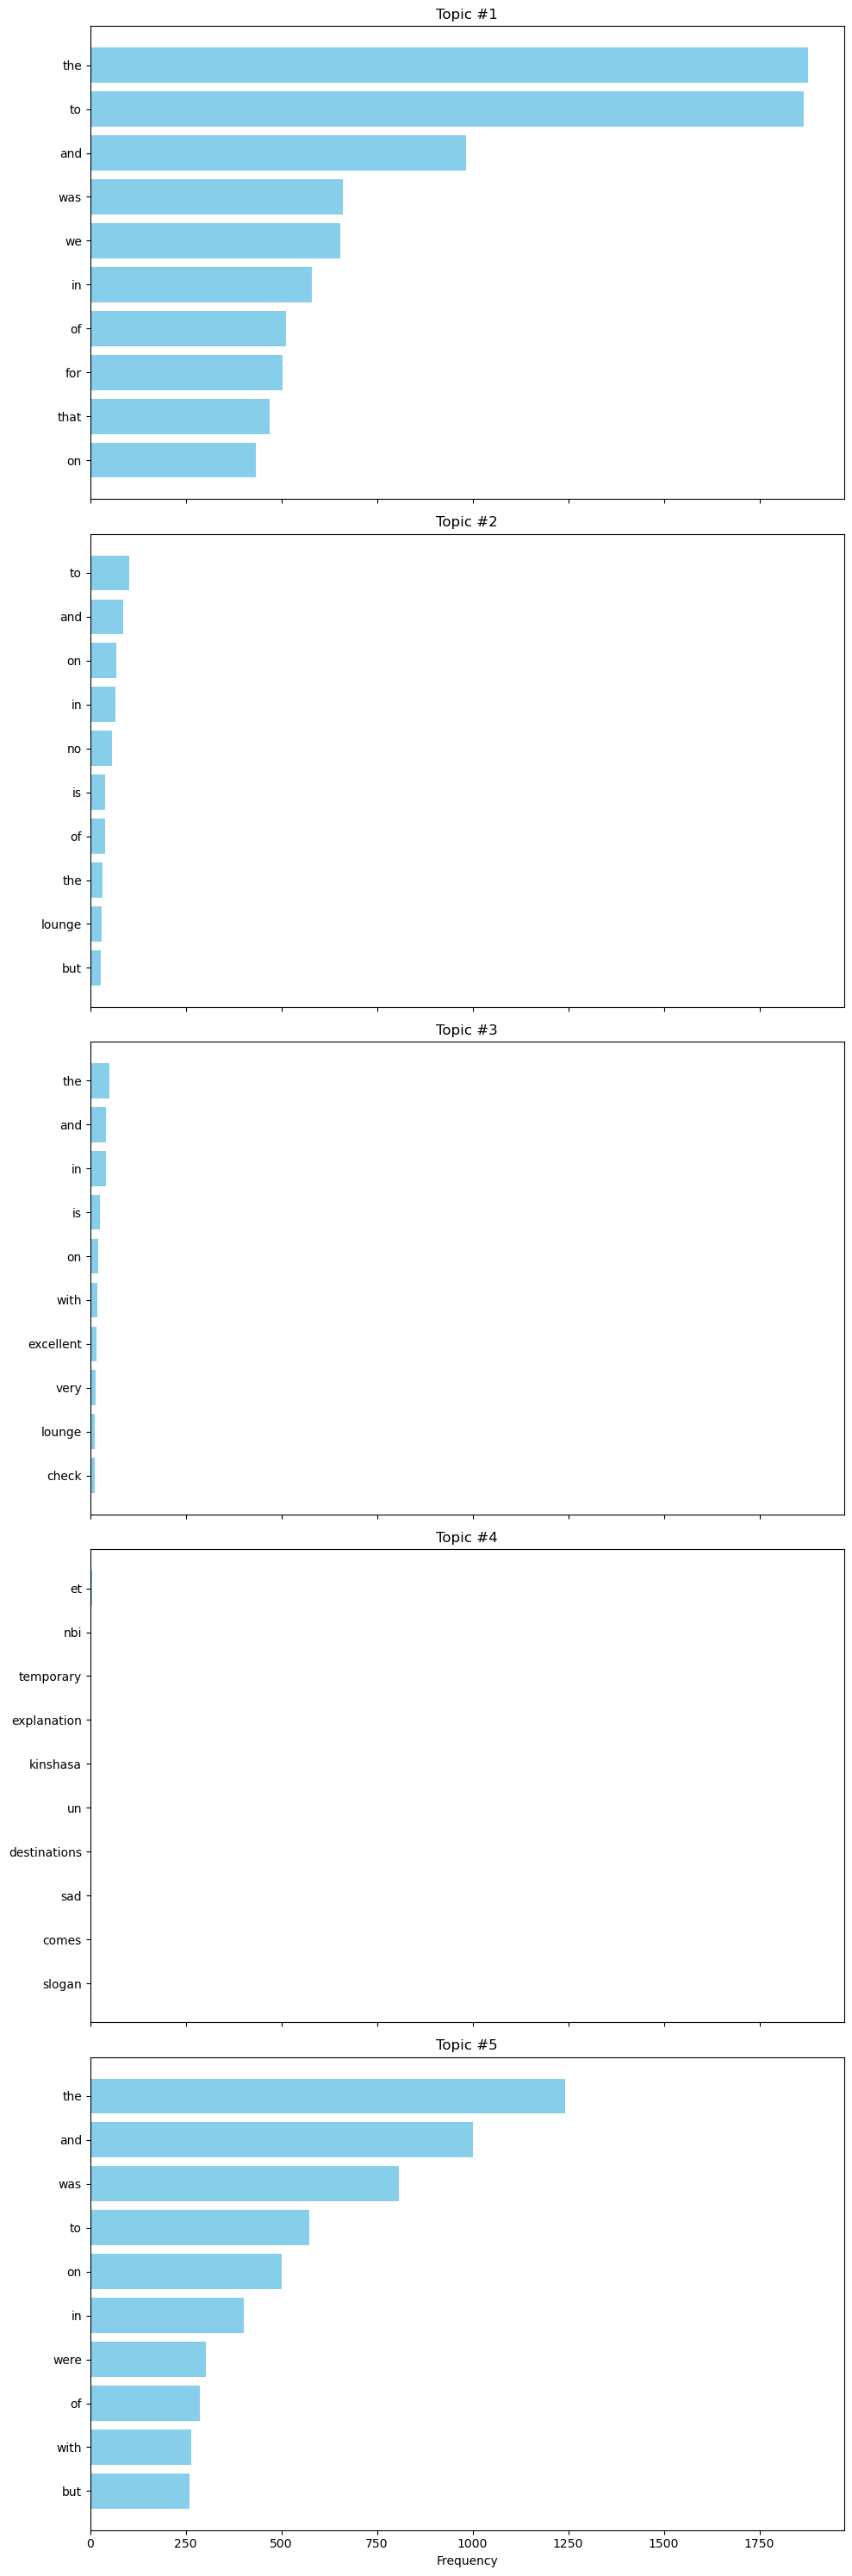

In [49]:
import matplotlib.pyplot as plt

# Function to plot the top words for each topic
def plot_top_words(model, feature_names, n_top_words):
    n_topics = len(model.components_)
    fig, axes = plt.subplots(n_topics, 1, figsize=(10, 6*n_topics), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_word_indices]
        top_word_frequencies = [topic[i] for i in top_word_indices]
        ax = axes[topic_idx]
        ax.barh(top_words, top_word_frequencies, color='skyblue')
        ax.set_title(f'Topic #{topic_idx + 1}')
        ax.invert_yaxis()
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot the top 10 words for each topic
print("\nTopics in LDA model:")
plot_top_words(lda, tf_feature_names, n_top_words=10)


# Combined Analysis of Topics 3 and 4: Top Words Visualization
In this section, we visualize the top words associated with Topics 3 and 4 from the LDA model, with a focus on specific terms that characterize these topics.

## Introduction
The visualization presents the top words extracted from Topics 3 and 4 of the LDA model, providing insights into the prevalent themes within the reviews of Kenya Airways.

## Methodology

### Visualization
A horizontal bar chart displays the top words for Topics 3 and 4, representing the frequency of each word. The visualization allows us to identify key terms that are most prominent in these topics.


Topics in LDA model:


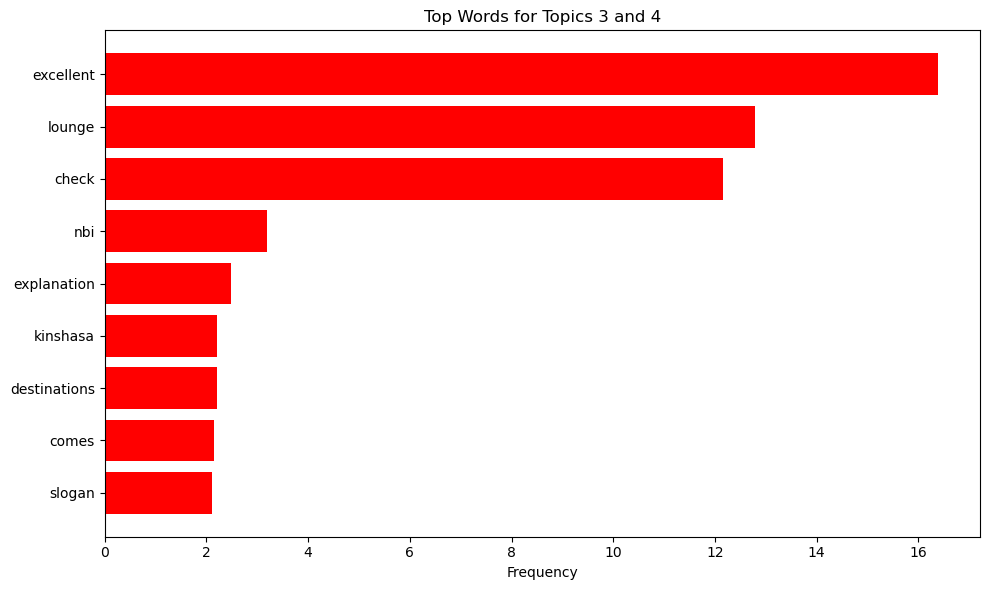

In [60]:
import matplotlib.pyplot as plt

# Additional stop words to exclude
custom_stop_words = ['the', 'and', 'in', 'is', 'on', 'with', 'very', 'et', 'temporary', 'un', 'sad']

# Function to plot the top words for specified topics while removing custom stop words
def plot_combined_topics(model, feature_names, topic_indices, n_top_words, custom_stop_words):
    combined_top_words = []
    combined_top_word_frequencies = []
    for topic_idx in topic_indices:
        topic = model.components_[topic_idx]
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_word_indices if feature_names[i] not in custom_stop_words]
        top_word_frequencies = [topic[i] for i in top_word_indices if feature_names[i] not in custom_stop_words]
        combined_top_words.extend(top_words)
        combined_top_word_frequencies.extend(top_word_frequencies)
    plt.figure(figsize=(10, 6))
    plt.barh(combined_top_words, combined_top_word_frequencies, color='red')
    plt.xlabel('Frequency')
    plt.title('Top Words for Topics 3 and 4')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot topics 3 and 4 combined with the top 10 words for each topic while removing custom stop words
print("\nTopics in LDA model:")
plot_combined_topics(lda, tf_feature_names, topic_indices=[2, 3], n_top_words=10, custom_stop_words=custom_stop_words)


**Results**:
The visualization reveals that passengers often describe their experiences as "excellent," suggesting positive sentiments associated with their interactions with Kenya Airways. Additionally, terms such as "check" and "lounge" indicate smooth processes during check-in and comfortable lounge facilities, respectively.

**Conclusion**:
The presence of terms like "excellent," "check," and "lounge" in Topics 3 and 4 suggests that passengers have positive experiences with Kenya Airways, particularly in terms of service quality and amenities. These insights can help Kenya Airways understand and address customer preferences and expectations more effectively.

### Visualization of Top 50 Most Frequent Words
In this section, we present a visualization of the top 50 most frequent words extracted from the reviews. The bar chart showcases the prevalence of these words across all topics, providing insights into the common terms used by passengers.

## Introduction
The visualization displays the top 50 most frequent words identified in the reviews of Kenya Airways. By examining the frequency of these words, we gain an understanding of the key themes and sentiments expressed by passengers.

## Methodology

### Visualization
A horizontal bar chart is used to represent the frequency of each word, with the length of the bar indicating its prevalence. The top 50 words are sorted based on their frequency, and common stop words are excluded to focus on meaningful terms.

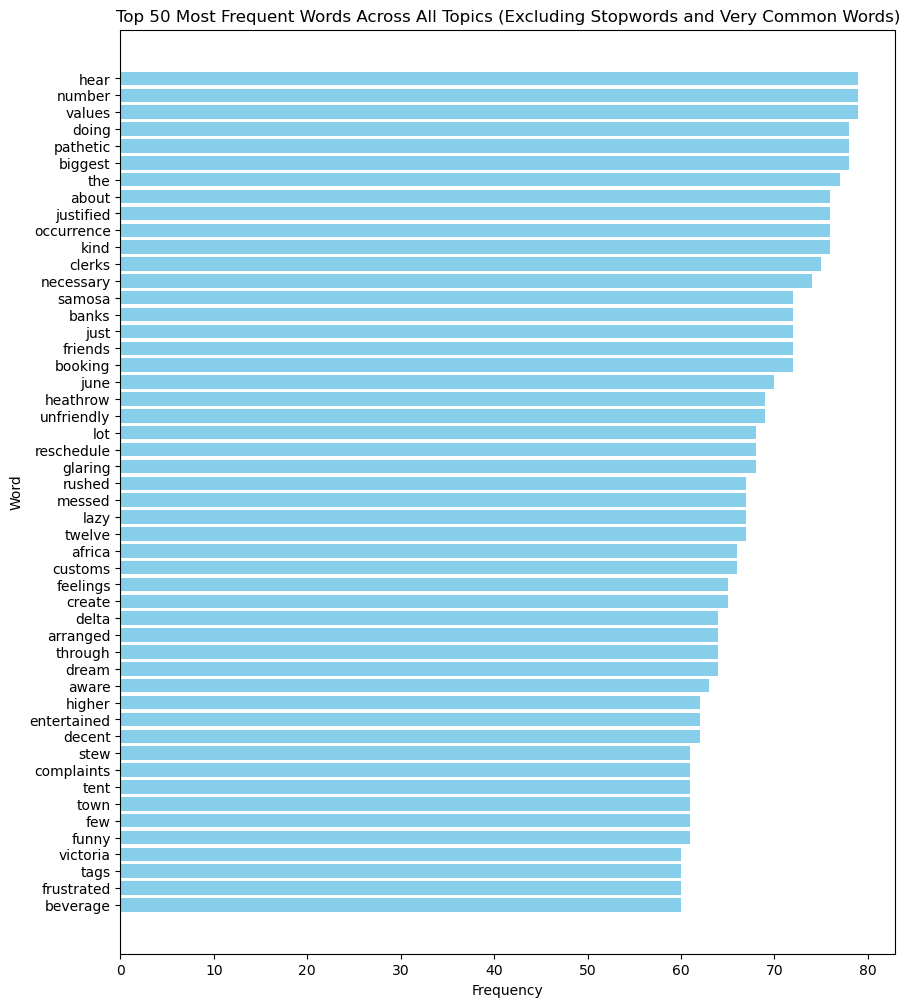

In [45]:
# Plot more than 20 most frequent words, let's say top 50
plt.figure(figsize=(10, 12))  # Adjust figure size as needed
plt.barh(sorted_feature_names[:50], sorted_word_frequencies[:50], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 50 Most Frequent Words Across All Topics (Excluding Stopwords and Very Common Words)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest frequency at the top
plt.show()


**Results**:
The visualization highlights various terms used by passengers to describe their experiences with Kenya Airways. Words such as "kind," "values," "unfriendly," "entertained," and "frustrated" indicate a range of sentiments expressed by passengers, including both positive and negative experiences.

**Conclusion**:
The presence of terms like "kind" and "entertained" suggests positive interactions and experiences with Kenya Airways staff and services. Conversely, words like "unfriendly" and "frustrated" may indicate areas for improvement or challenges faced by passengers.

Overall, this visualization provides valuable insights into the common terms and sentiments expressed in the reviews, helping Kenya Airways understand customer feedback and prioritize areas for enhancement.



#Sentiment Distribution of Reviews for Kenya Airways

We analyzed the sentiment distribution of the reviews for Kenya Airways and visualized the results using a pie chart. The pie chart below illustrates the proportion of positive, negative, and neutral sentiments expressed in the reviews.


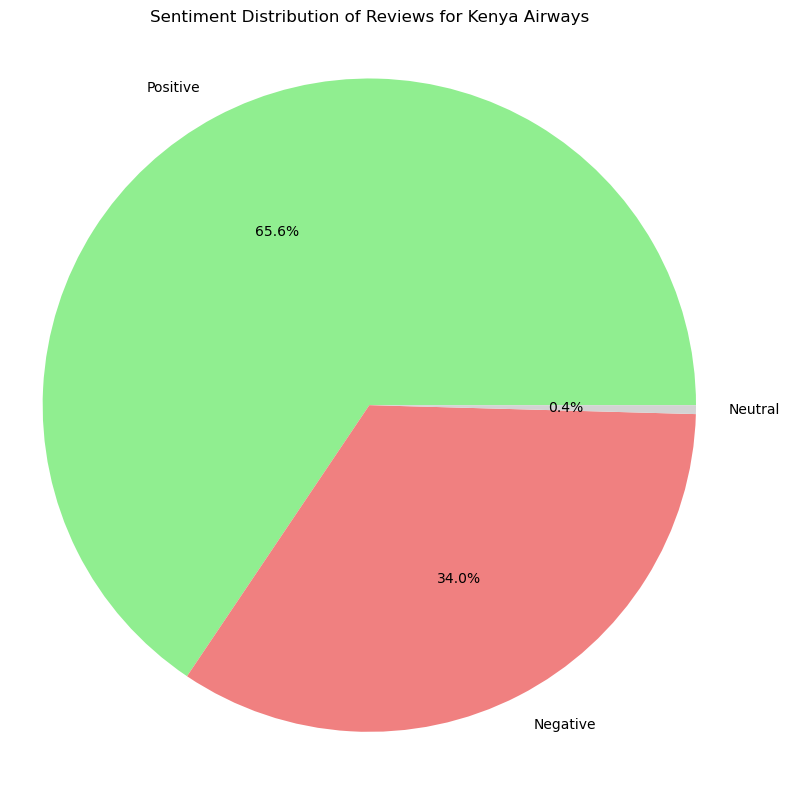

In [59]:
# Plotting the sentiment distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgray'])
plt.title('Sentiment Distribution of Reviews for Kenya Airways')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


**Analysis**:
The sentiment distribution indicates that a majority of the reviews (**65.58%**) are classified as positive, suggesting that customers generally had positive experiences with Kenya Airways.
However, a significant portion of reviews (**33.99%**) are classified as negative, indicating areas where improvement may be needed.
Only a very small proportion of reviews (**0.44%**) are classified as neutral, which suggests that most reviewers had strong opinions about their experiences with Kenya Airways.

This analysis provides insights into the overall sentiment of customers towards Kenya Airways, highlighting areas of strength and areas that may require attention for improvement.

# Conclusion
Throughout this analysis, we delved into Kenya Airways customer reviews to extract insights using various data science techniques. Here's a summary of our key findings:

**Sentiment Analysis**: The majority of customer reviews expressed positive sentiments, indicating overall satisfaction with Kenya Airways services.
Topic Modeling with LDA: Topic modeling revealed several key themes in customer reviews, including flight experiences (e.g., time, food, seats), service quality (e.g., staff, cabin crew), and airport operations (e.g., boarding, delays). These insights provide valuable information for understanding customer preferences and areas for improvement.

**Top Word Visualization**: Visualizing the most frequent words across all topics allowed us to identify common terms used in customer reviews, such as "good," "time," "flight," and "service."
Overall, this analysis provides actionable insights for Kenya Airways to enhance customer satisfaction, improve service quality, and optimize operations. By leveraging data science techniques, we can drive informed decision-making and ultimately deliver a better customer experience.






